In [3]:
import notebook_utils as utils
import numpy as np

import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import numpy as np
import cv2
import shapely
from shapely.geometry import Polygon
from pathlib import Path

def imshow(img, size=15):
    plt.figure(figsize = (size,size))
    plt.axis('off')
    plt.imshow(img)

In [43]:
source_folder = Path('datasets/SROIE2019/0325updated.task1train(626p)')

images = utils.list_files(source_folder, '*.jpg')

label_file = source_folder / (images[0].stem + '.txt')

In [45]:
bboxes = []

In [54]:
def visualize_image(image_path):
    image_path = Path(image_path)

    label_file = source_folder / (image_path.stem + '.txt')
    if not label_file.is_file():
        print("No label file found")
    
    bndBoxFile = open(label_file, 'r')
    
    image = cv2.imread(str(image_path))
    
    bboxes = []
    for bndBox in bndBoxFile:
        text_split = bndBox[:-2].split(',')
        x0, y0, x1, y1, x2, y2, x3, y3 = text_split[:8]
        bboxes.append([[x0, y0], [x1,y1], [x2,y2], [x3,y3]])
        
        text = ','.join(text_split[8:])
        
    bboxes = np.array(bboxes, dtype=np.int32)
    viz_image = image.copy()
    for i, box in enumerate(bboxes):
        cv2.polylines(viz_image, [box[:8].reshape((-1, 1, 2))], True, color=(255, 0, 255), thickness=3)
    
    return image, viz_image

In [55]:
file = source_folder / "X51007846451.jpg"

In [58]:
img.shape

(7016, 4961, 3)

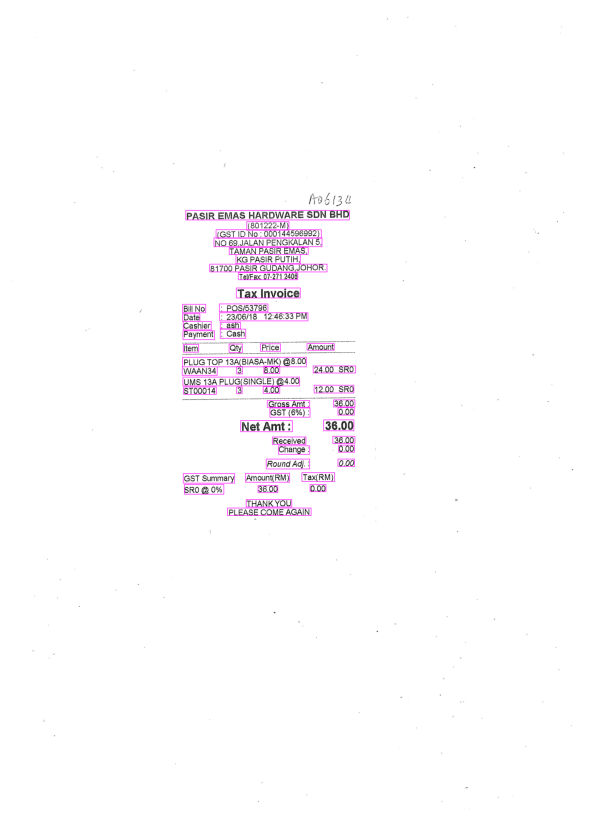

In [56]:
img, viz = visualize_image(file)

imshow(viz)